Zajecia 1 Zadanie 5

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('train/in.tsv', header=None, sep='\t')
df.columns = ['price', 'mileage', 'year', 'brand', 'engingeType', 'engineCapacity']
df = pd.DataFrame(df, columns = ['price', 'mileage', 'year', 'brand', 'engingeType', 'engineCapacity'])
df.head()


,price,mileage,year,brand,engingeType,engineCapacity
0,92000,75600,2012,Volvo,benzyna,3200
1,49300,21000,2016,Kia,diesel,1396
2,45900,66000,2015,Toyota,diesel,1400
3,32900,115000,2015,Skoda,diesel,1600
4,36900,200000,2012,Renault,diesel,2000


In [3]:
print df.corr()

                   price   mileage      year  engineCapacity
price           1.000000 -0.456966  0.544610        0.329526
mileage        -0.456966  1.000000 -0.585090        0.191366
year            0.544610 -0.585090  1.000000       -0.139172
engineCapacity  0.329526  0.191366 -0.139172        1.000000


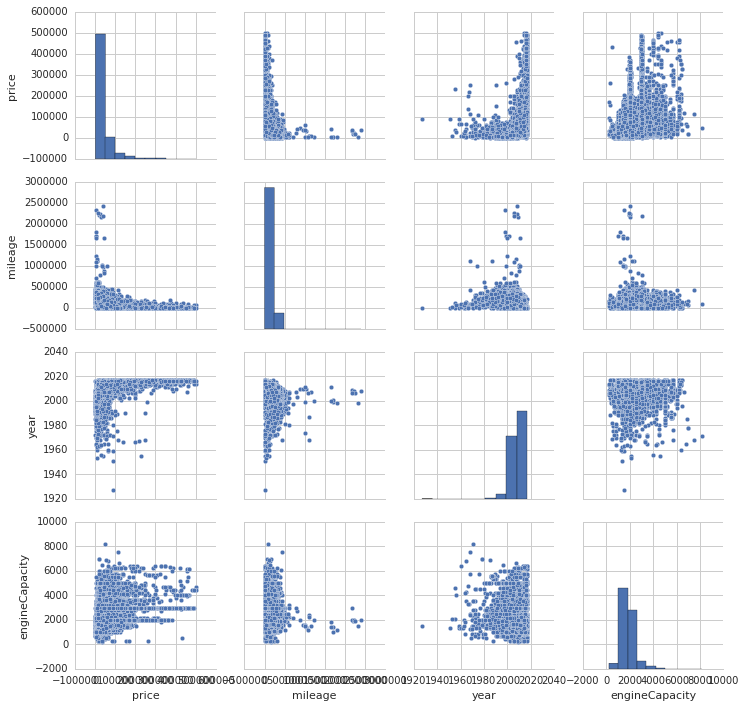

In [4]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['price', 'mileage', 'year', 'brand', 'engingeType', 'engineCapacity']
sns.pairplot(df[cols], size=2.5)
plt.show()


from sklearn.linear_model import LinearRegression
X = pd.DataFrame(df, columns = ['year'])
lm = LinearRegression()
lm.fit(X, df.price)

In [72]:
m = 0
b = 0
y = lambda x : m * x + b

In [73]:
x_points = df['mileage'].tolist()
y_points = df['price'].tolist()

In [74]:
from sklearn import preprocessing
x_std = preprocessing.scale(x_points)
y_std = preprocessing.scale(y_points)
x_points = x_std
y_points = y_std

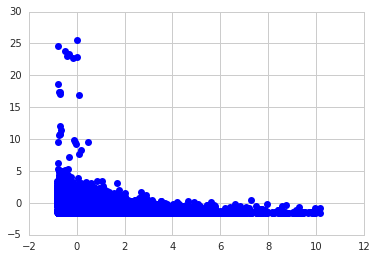

In [75]:
plt.plot(y_points, x_points, 'bo')

In [76]:
def plot_line(y, data_points):
    x_values = [i for i in range(int(min(data_points))-1, int(max(data_points))+2)]
    y_values = [y(x) for x in x_values ]
    plt.plot(x_values, y_values, 'r')

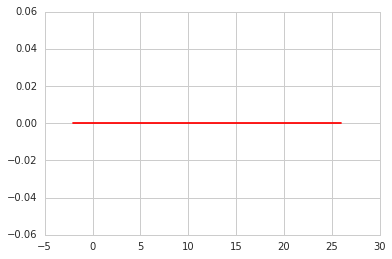

In [77]:
plot_line(y, x_points)

In [78]:
learn = 0.01 

In [79]:
def summation(y, x_points, y_points):
    total1 = 0
    total2 = 0
    
    for i in range(1, len(x_points)):
        total1 += y(x_points[i]) - y_points[i]
        total2 += (y(x_points[i]) - y_points[i]) * x_points[i]
    return total1 / len(x_points), total2 / len(x_points)

In [80]:
for i in range(900):
    s1, s2 = summation(y, x_points, y_points)
    m = m - learn * s2
    b = b - learn * s1   


In [81]:
m

-0.45689890411849593

In [82]:
b

-1.7647188323646098e-05

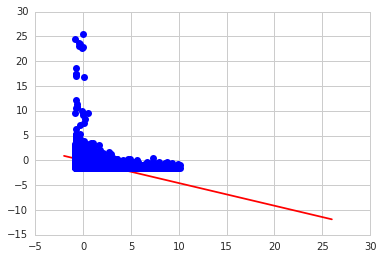

In [83]:
plot_line(y, x_points)
plt.plot(y_points, x_points, 'bo')